In [0]:
##Author Keerthi Ningegowda
##Master's in Computer Science with Big Data concentration
##Simon Fraser University, Burnaby
##Created on : April 13 2020

In [0]:
##Importing the dependencies and test data
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

##Reading the data
data = pd.read_csv('C:/Users/Keerthi Ningegowda/Desktop/bd2_data/nor_data.csv')
data

,Pos,Value,Anomaly
0,34:00.0,0.789063,0
1,34:00.0,0.785156,0
2,34:00.1,0.785156,0
3,34:00.1,0.789063,0
4,34:00.2,0.785156,0
...,...,...,...
3733,36:27.3,0.773438,0
3734,36:27.4,0.800781,0
3735,36:27.4,0.796875,0
3736,36:27.4,0.761719,0


In [0]:
# Load the model
from tensorflow.python.keras.models import model_from_json
json_file = open('ANN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("ANN_Elevator.h5")
print("Loaded model from disk")

Loaded model from disk


In [0]:
##Getting the acceleration values from test data
Z = data['Value'].values


In [0]:
#Performing the Z normalization
test_scaler = StandardScaler(with_mean = True, with_std = True)
Z = Z.reshape(-1,1)
testZ = test_scaler.fit_transform(Z)
mean = np.mean(testZ)

In [0]:
#Performing moving averages to reduce noise

testmovAvg = pd.DataFrame(data=testZ[:],
                     columns = ['Zmovavg'])
Y_true = testmovAvg.rolling(window=1).mean().fillna(mean)

In [0]:
##Predicting the acceleration values of Z-scale

Y_pred = model.predict(Y_true)

In [0]:
##Creating an error dataframe 

error_df = pd.DataFrame(columns=['timestamp','y_pred','y_true','difference','actual_label'])

In [0]:
##Filling the error dataframe with timestamp,Y_pred, Y_true, absolute difference and lables

error_df['timestamp'] = data['Pos']
error_df['y_pred'] = Y_pred.flatten()
error_df['y_true'] = Y_true['Zmovavg'].values.flatten()
error_df['actual_label'] = data['Anomaly']

error_df['difference'] = np.abs(error_df['y_pred']-error_df['y_true'])

In [0]:
##Setting the threshold

threshold = 0.0064460794447717355

0.0064460794447717355

In [0]:
##Filling the labels based on threshold value
##If Y_pred <= threshold, then the point is not an anamoly
##else an anamoly

error_df['label'] = np.where(error_df['difference'] <= threshold,0,1)

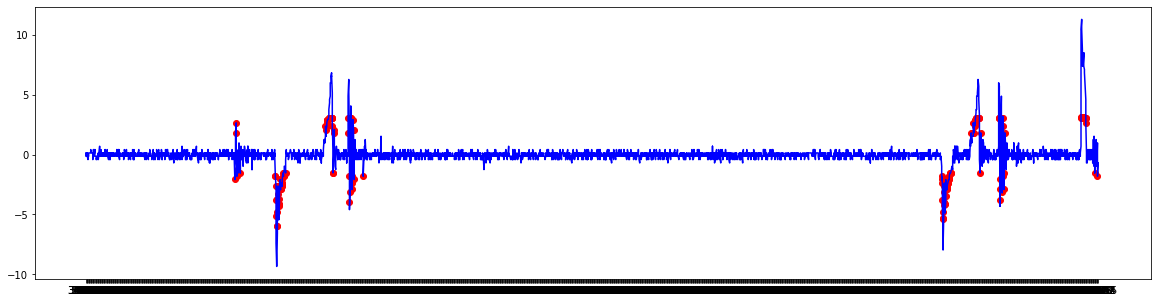

In [0]:
##Plotting the original signals and anamolies in the signals

##Red points indicate anamoly 

import matplotlib.pyplot as plt

new_df = error_df['timestamp']
z_pred = error_df['y_pred']
z_actual=error_df['y_true']
plt.figure(figsize=(20,5))
plt.plot(new_df,z_actual,label='original')
plt.scatter(time,points,color='red')
plt.show()

In [0]:
##Evaluating the model performance by calculating precision

In [0]:
##Computing confusion matrix

from sklearn.metrics import confusion_matrix

tn,fp,fn,tp = confusion_matrix(error_df['actual_label'],error_df['label']).ravel()

In [0]:
##Calculating precision and recall

precision = tp/(tp + fp)
recall = tp/(tp + fn) 

In [0]:
#Calculating f1_score

f1_score = (2*(precision * recall))/(precision + recall)

In [0]:
precision

0.18181818181818182

In [0]:
fn

16

In [0]:
f1_score

0.28691983122362874